In [1]:
import numpy as np
import pandas as pd 

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

from sklearn import datasets

# basic functions 

### function to draw decision boundary

In [17]:
def plot_decision_boundary(clf, x1, x2, y_labels, ax = None, fill_regions=True, 
                           draw_boundary = True, title=None):
    # find the borders to form a grid
    x1_min, x1_max = x1.min()-1, x1.max()+1
    x2_min, x2_max = x2.min()-1, x2.max()+1
    
    # create a meshgrid (in this case it is 2d grid) with these boundaries
    xx, yy = np.meshgrid(np.arange(x1_min-10, x1_max+10, 1),
                         np.arange(x2_min-10, x2_max+10, 1))
    '''
    We can create all possible points in that meshgrid with xx and yy
    and tell the classifier to predict the for all the points in that grid.
    '''
    all_possible_points = np.c_[xx.ravel(), yy.ravel()]
    '''
    If this classifier can predict the probabilities get them. Otherwise just
    get the normal predicted value(class label [1/0]). It is importatant because 
    we can map the predicted values to a colour in our colourmap. If predicted 
    values are probabilities, we can plot in such a way that we can interpret like how 
    strong a perticular region is, just by looking at the plot.
    '''
    if hasattr(clf, 'predict_proba'):
        # we can take probabilitied of any one class (ay column)
        predicted = clf.predict_proba(all_possible_points)[:, 1]
    else:
        predicted = clf.predict(all_possible_points)
    # reshape the predicted into grid
    Z = predicted.reshape(xx.shape)
    
    # create an axes if we don't have it 
    if ax is None:
        # get the current axes object to plot 
        ax=plt.gca()
        
    # plot the decision boundary with a black line
    if draw_boundary:
        ax.contour(xx, yy, Z, colors='k', levels=[0.5])
    # fill the regions 
    if fill_regions:
        ax.contourf(xx,yy, Z, cmap=plt.cm.RdYlGn, alpha=0.8)
    # plot the original points with the same colour but darker
    ax.scatter(x1,x2,s=15, c=y_labels, cmap=plt.cm.RdYlGn, marker='+')
    ax.set(xlim=[x1_min, x1_max], ylim=[x2_min, x2_max],
          xticks=[], yticks=[])
    if title is not None:
        ax.set_title(title)

### function to draw plots in gives axes objects

In [70]:
def draw_big_picture(X, y, ax_original,classifiers, axs, titles, put_titles=True):
    # saperate the dataframe
    x1, x2 = X[:,0], X[:,1]
    
    # draw the original plot on the axes specified
    if put_titles:
        ax_original.set_title('Original Data')
    ax_original.scatter(x1, x2, c=y, marker='+', cmap=plt.cm.RdYlGn, s=15)
    ax_original.set_xlim(x1.min()-1, x1.max()+1)
    ax_original.set_ylim(x2.min()-1, x2.max()+1)
    ax_original.set(xticks=[], yticks=[])
    
    if  not put_titles:
        for clf, ax in zip(classifiers, axs):
            plot_decision_boundary(clf, x1, x2, y, ax=ax)
    else:
        for clf, ax, title in zip(classifiers, axs, titles):
            plot_decision_boundary(clf, x1, x2, y, ax=ax, title=title)
   

### function to save individual images to make gif out of them

In [81]:
def save_plots_for_gif(X, y, clfs, titles, dir_name=None):
    x1, x2 = X[:,0], X[:,1]
    for clf, title in zip(clfs, titles):
        # find the borders to form a grid
        x1_min, x1_max = x1.min()-1, x1.max()+1
        x2_min, x2_max = x2.min()-1, x2.max()+1

        # create a meshgrid (in this case it is 2d grid) with these boundaries
        xx, yy = np.meshgrid(np.arange(x1_min-10, x1_max+10, 1),
                             np.arange(x2_min-10, x2_max+10, 1))
        
        all_possible_points = np.c_[xx.ravel(), yy.ravel()]
        if hasattr(clf, 'predict_proba'):
            # we can take probabilitied of any one class (ay column)
            predicted = clf.predict_proba(all_possible_points)[:, 1]
        else:
            predicted = clf.predict(all_possible_points)
        # reshape the predicted into grid
        Z = predicted.reshape(xx.shape)

        fig = plt.figure(figsize=plt.figaspect(1))
        ax = plt.subplot(111)

        # plot the decision boundary with a black line
        ax.contour(xx, yy, Z, colors='k', levels=[0.5])
        ax.contourf(xx,yy, Z, cmap=plt.cm.RdYlGn, alpha=0.8)

        # plot the original points with the same colour but darker
        ax.scatter(x1,x2,s=15, c=y, cmap=plt.cm.RdYlGn, marker='+')
        ax.set(xlim=[x1_min, x1_max], ylim=[x2_min, x2_max],
              xticks=[], yticks=[],
              title=title)
        path=dir_name+title+'.png' if dir_name is not None else title+'.png'
        fig.savefig(path)
        plt.show()


# 1. KNearestNeighbours classifier

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
def get_knn_classifiers(k_values, X, y, verbose=True):
    # for classifiers references
    clfs = list()
    
    # train a classifier for each k value
    for k in k_values:
        if verbose: print('Training knn with k = {}...'.format(k))
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X,y)
        if verbose: print('Done.')
        clfs.append(knn)
    
    return clfs


In [8]:
def get_knn_titles(k_values):
    titles = list()
    for i,k in enumerate(k_values):
        titles.append('n_neighbours = {}-{}'.format(k,i+1))
    return titles

### function to create Image grid

In [75]:
from matplotlib import gridspec

def create_big_picture_for_knn(X, y, clfs, titles, dir_name=None):
    # Setting figure size in proportion to number of rows and columns to get square shaped subplots. 
    fig = plt.figure(figsize=(24,16))
    fig.suptitle('KNN for well saperated data - For different K values')
    # creating grid for the subplots
    gs = gridspec.GridSpec(nrows=4, ncols=6)
    # axes for original plot
    ax_original = plt.subplot(gs[0,1])
    
    axs = list()
    # axes for k = 1 
    axs.append(plt.subplot(gs[0, 3]))
    for i in range(4,24):
        axs.append(plt.subplot(gs[i]))

    # draw the plot and save figure in low and hight dpi
    draw_big_picture(X, y, ax_original=ax_original, classifiers=clfs, axs=axs,titles=titles)
    
    low_dpi_path = dir_name+'knn_low_dpi.png' if dir_name is not None else 'knn_low_dpi.png'
    fig.savefig(low_dpi_path)
    
    high_dpi_path = dir_name+'knn_high_dpi.png' if dir_name is not None else 'knn_high_dpi.png'
    fig.savefig(high_dpi_path, dpi=200)


    plt.show()

##  1.1. KNN on this Noise free concentric circular data

<IPython.core.display.Javascript object>


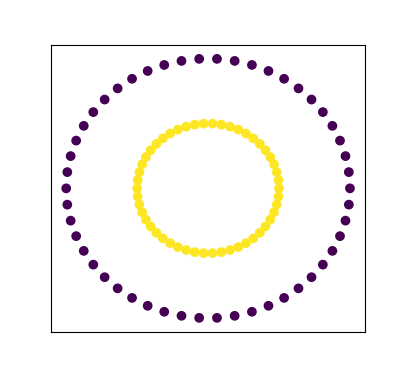

In [90]:
fig = plt.figure(figsize=plt.figaspect(1))
ax = plt.subplot(111)
X, y = datasets.make_circles(factor=0.5, noise=0.00)
plt.scatter(x=X[:,0], y=X[:,1], c=y)
ax.set(xticks=[], yticks=[])
fig.savefig('knn/noise_free/original.png')
plt.show()

### 1.1.1 Creating big picture for knn for different values with stepsize = 5

In [82]:
# create k values to get the trained classifiers for that data
k_values = list()
k_values.append(1) # least value we could give
k_values.extend(range(5,101,5)) # values from 5 to 100 with stepsize of 5


# get classifiers with that k_values
clfs = get_knn_classifiers(k_values, X, y, verbose=False)

# create titles for each plot according to k_values 
titles = list()
for k in k_values:
    titles.append('n_neighbours = {}'.format(k))

<IPython.core.display.Javascript object>


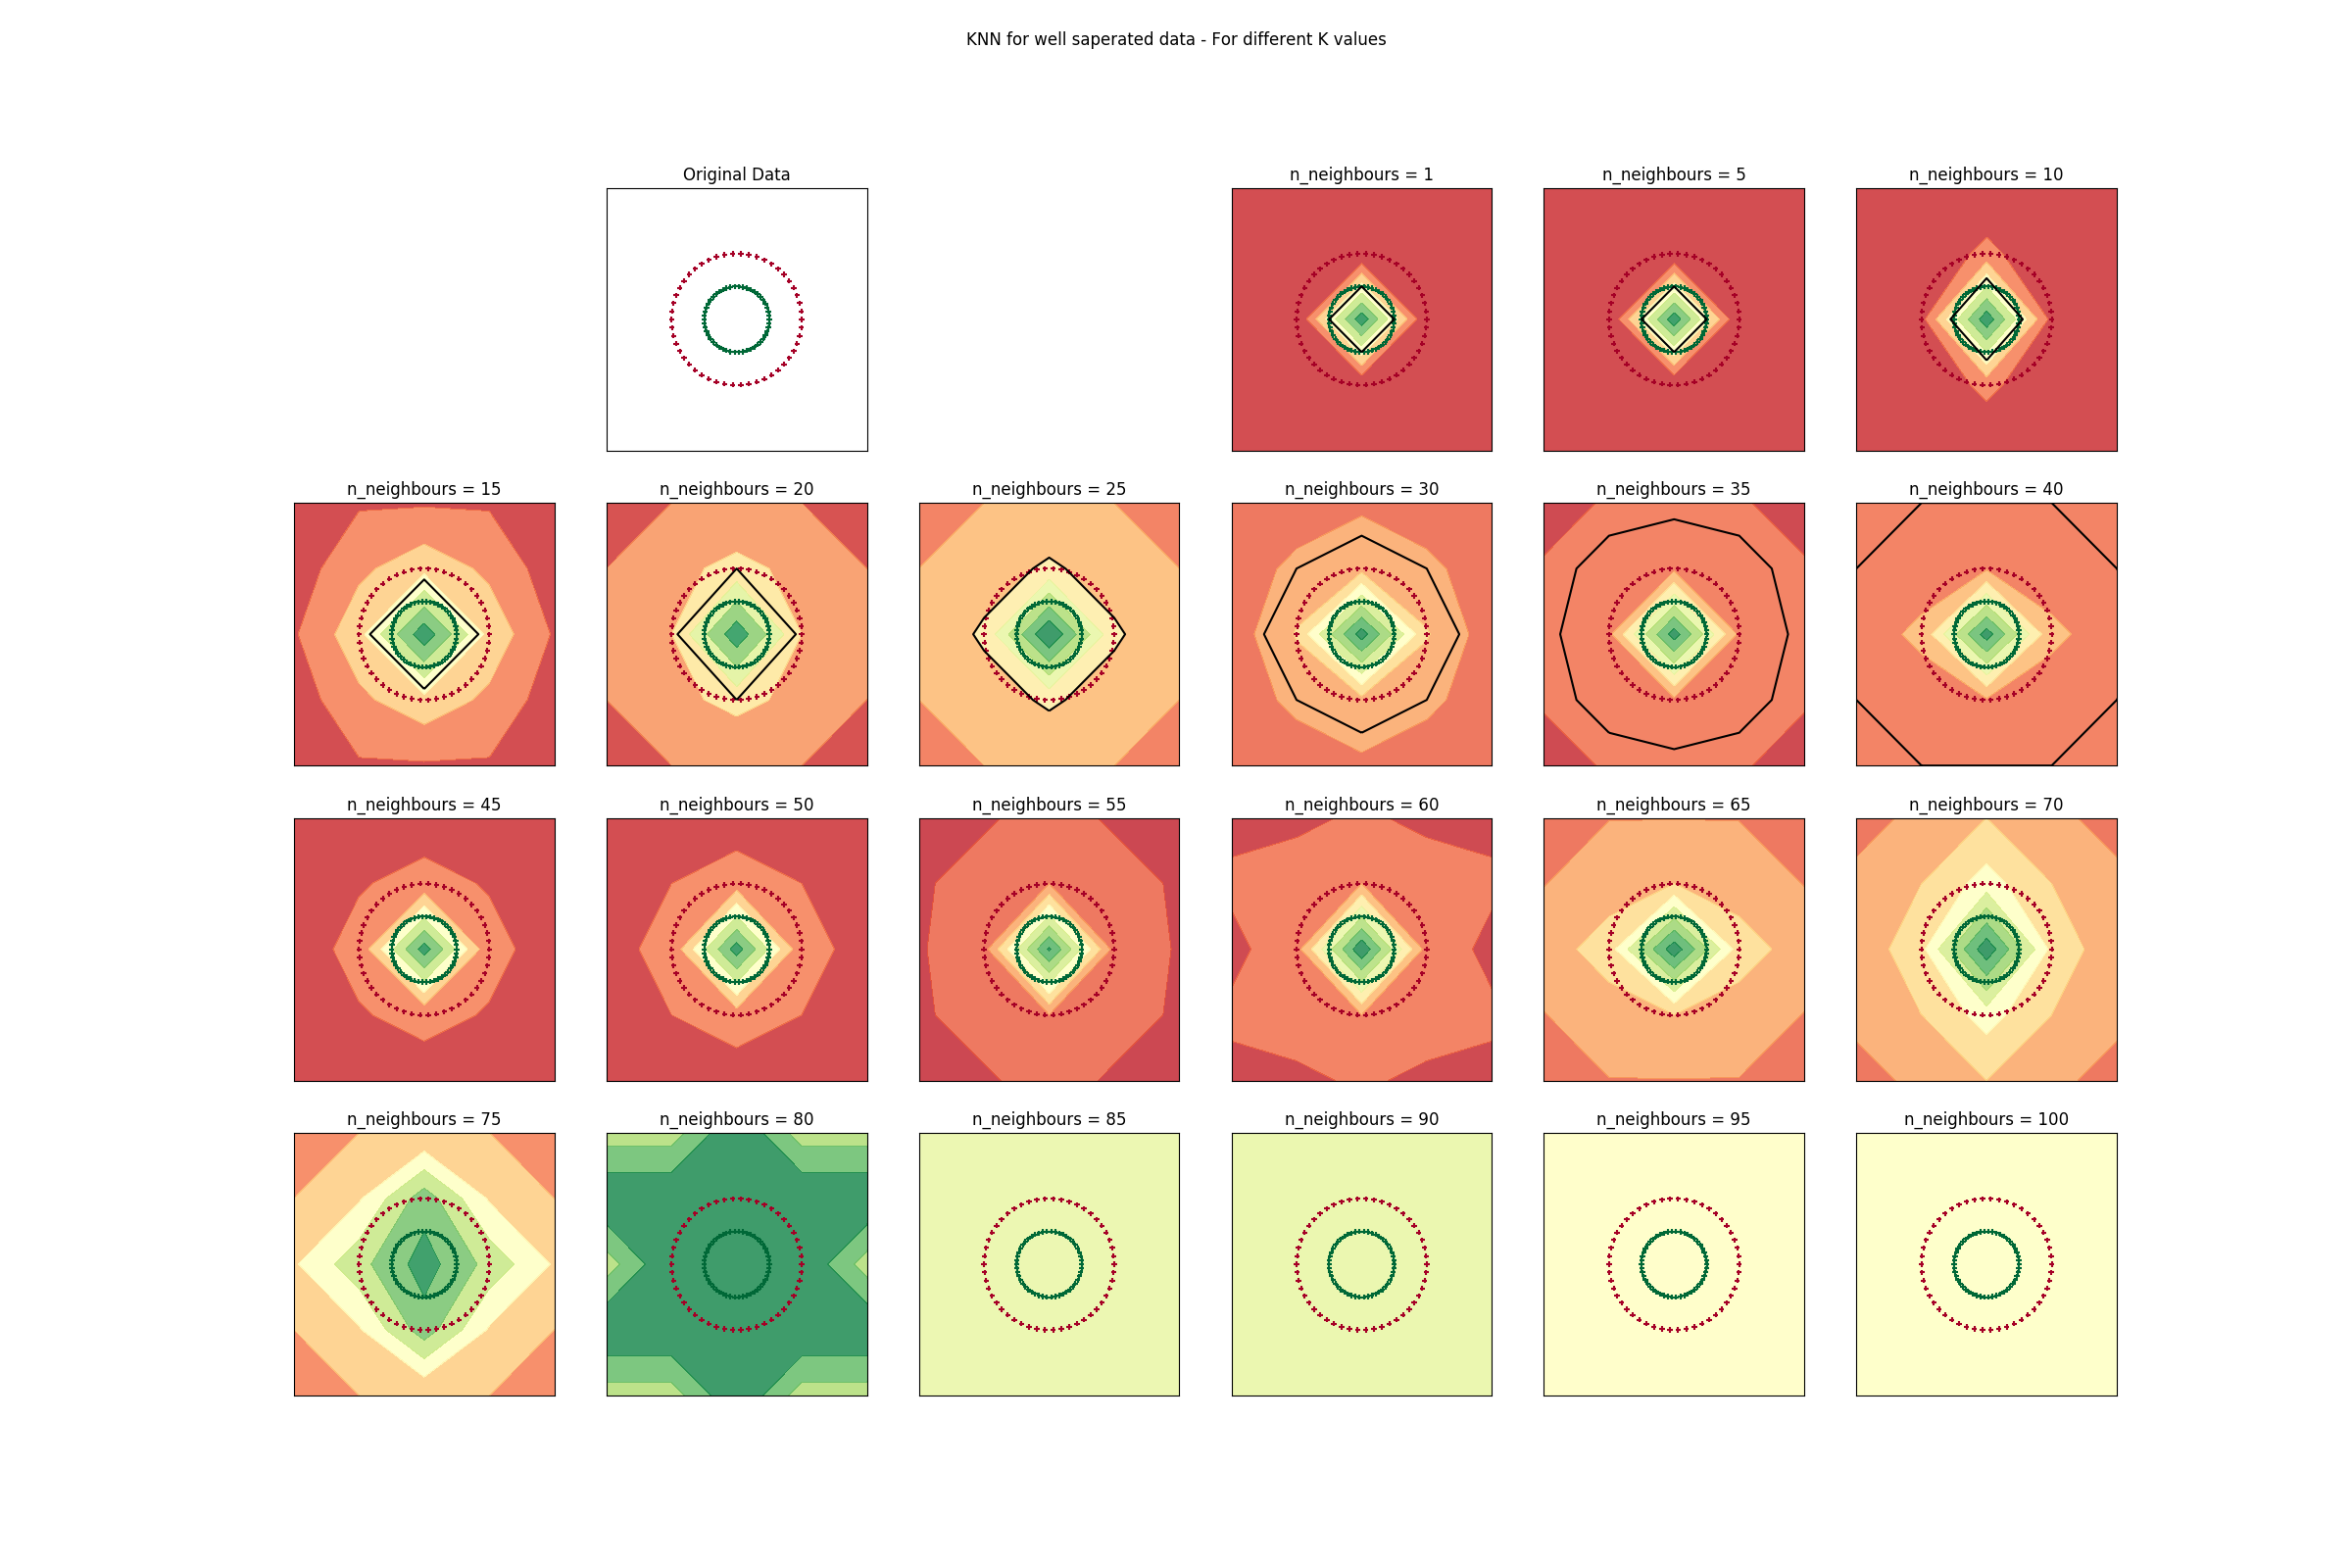

In [84]:
create_big_picture_for_knn(X,y,clfs, titles, dir_name='knn/noise_free/')

### 1.1.2 Creating plots with  k = [ 1, 100 ]    for gif images 

In [79]:
# create k values to get the trained classifiers for that data
k_values = list()
k_values.extend([1]*10)
k_values.extend(range(2,100)) # values from 5 to 100 with stepsize of 5
k_values.extend([100]*10)

# get classifiers with that k_values
clfs = get_knn_classifiers(k_values, X, y, verbose=False)

# create titles for each plot according to k_values 
titles = get_knn_titles(k_values)

In [86]:
# call function to save plots to make gif
save_plots_for_gif(X,y,clfs,titles, dir_name='knn/noise_free/knn_step_size_1/') 

##  1.2. KNN on low Noise concentric circular data

<IPython.core.display.Javascript object>


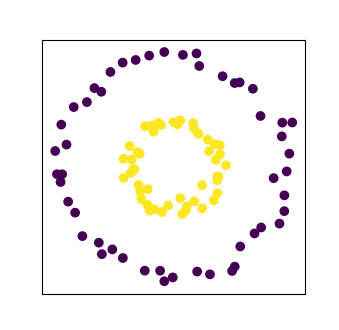

In [91]:
fig = plt.figure(figsize=plt.figaspect(1))
ax = plt.subplot(111)

X1, y1 = datasets.make_circles(factor=0.4, noise=0.05)
plt.scatter(x=X1[:,0], y=X1[:,1], c=y1)
ax.set(xticks=[], yticks=[])
plt.savefig('knn/mild_noise/original.png')
plt.show()

### 1.2.1. Creating big picture with k values with step size 5

In [92]:
# creating k values
k_values = list()
k_values.append(1)
k_values.extend(range(5,101,5))

# get classifiers
classifiers = get_knn_classifiers(k_values, X1, y1,verbose=False)

# get titles with appropriate k value
titles = get_knn_titles(k_values)

<IPython.core.display.Javascript object>


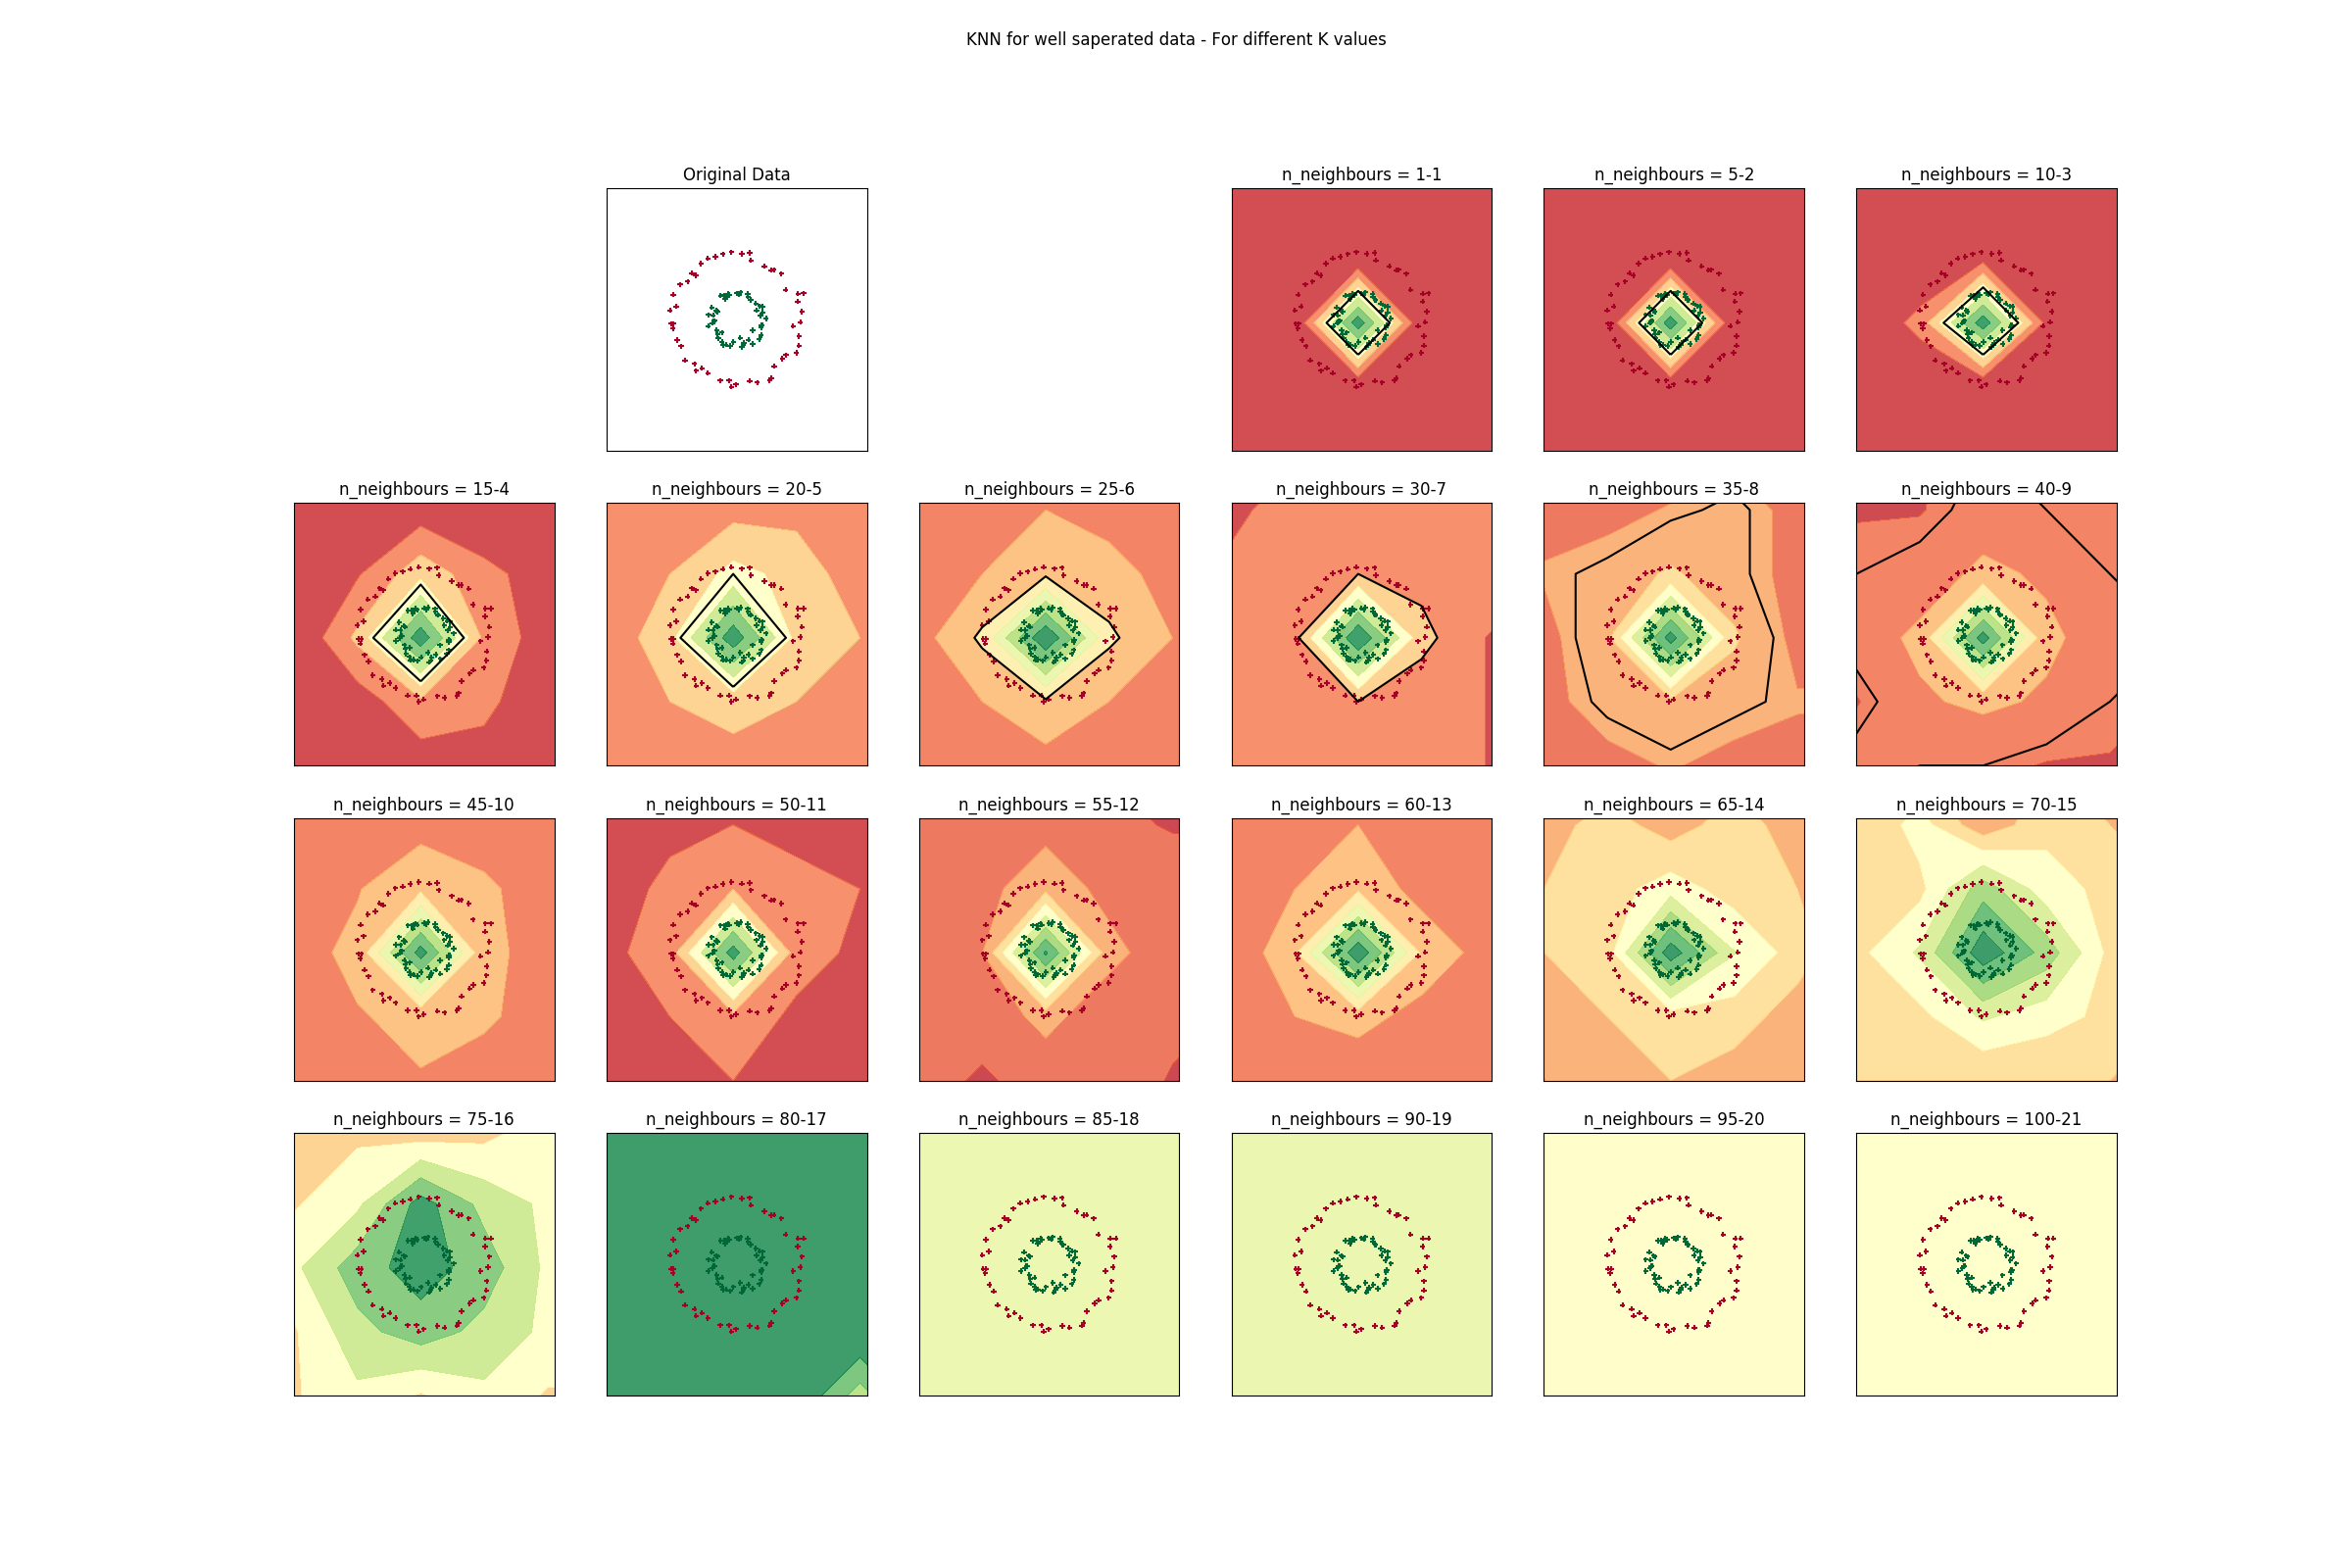

In [93]:
create_big_picture_for_knn(X1, y1, classifiers,  titles, dir_name='knn/mild_noise/')

### 1.2.2 creating individual plots for k=[ 1 , 100 ] with stepsize of 1

In [96]:
# creating k values
k_values = list()
k_values.extend([1]*10)
k_values.extend(range(2,100))
k_values.extend([100]*10)

In [107]:
save_plots_for_gif(X1, y1, 
                   get_knn_classifiers(k_values, X1, y1, verbose=False),
                   get_knn_titles(k_values), 
                   dir_name='knn/mild_noise/knn_step_size_1/')

##  1.3. KNN on  Noisy concentric circular data

<IPython.core.display.Javascript object>


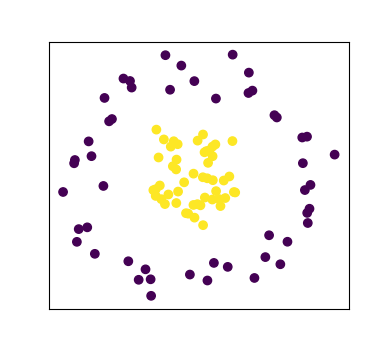

In [99]:
fig = plt.figure(figsize=plt.figaspect(1))
ax = plt.subplot(111)

X2, y2 = datasets.make_circles(factor=0.3, noise=0.1)
plt.scatter(x=X2[:,0], y=X2[:,1], c=y2)
ax.set(xticks=[], yticks=[])

plt.savefig('knn/high_noise/original.png')
plt.show()

### 1.3.1. Creating big picture with k values with step size 5

In [100]:
# creating k values
k_values = list()
k_values.append(1)
k_values.extend(range(5,101,5))

# get classifiers
classifiers = get_knn_classifiers(k_values, X1, y1,verbose=False)

# get titles with appropriate k value
titles = get_knn_titles(k_values)

<IPython.core.display.Javascript object>


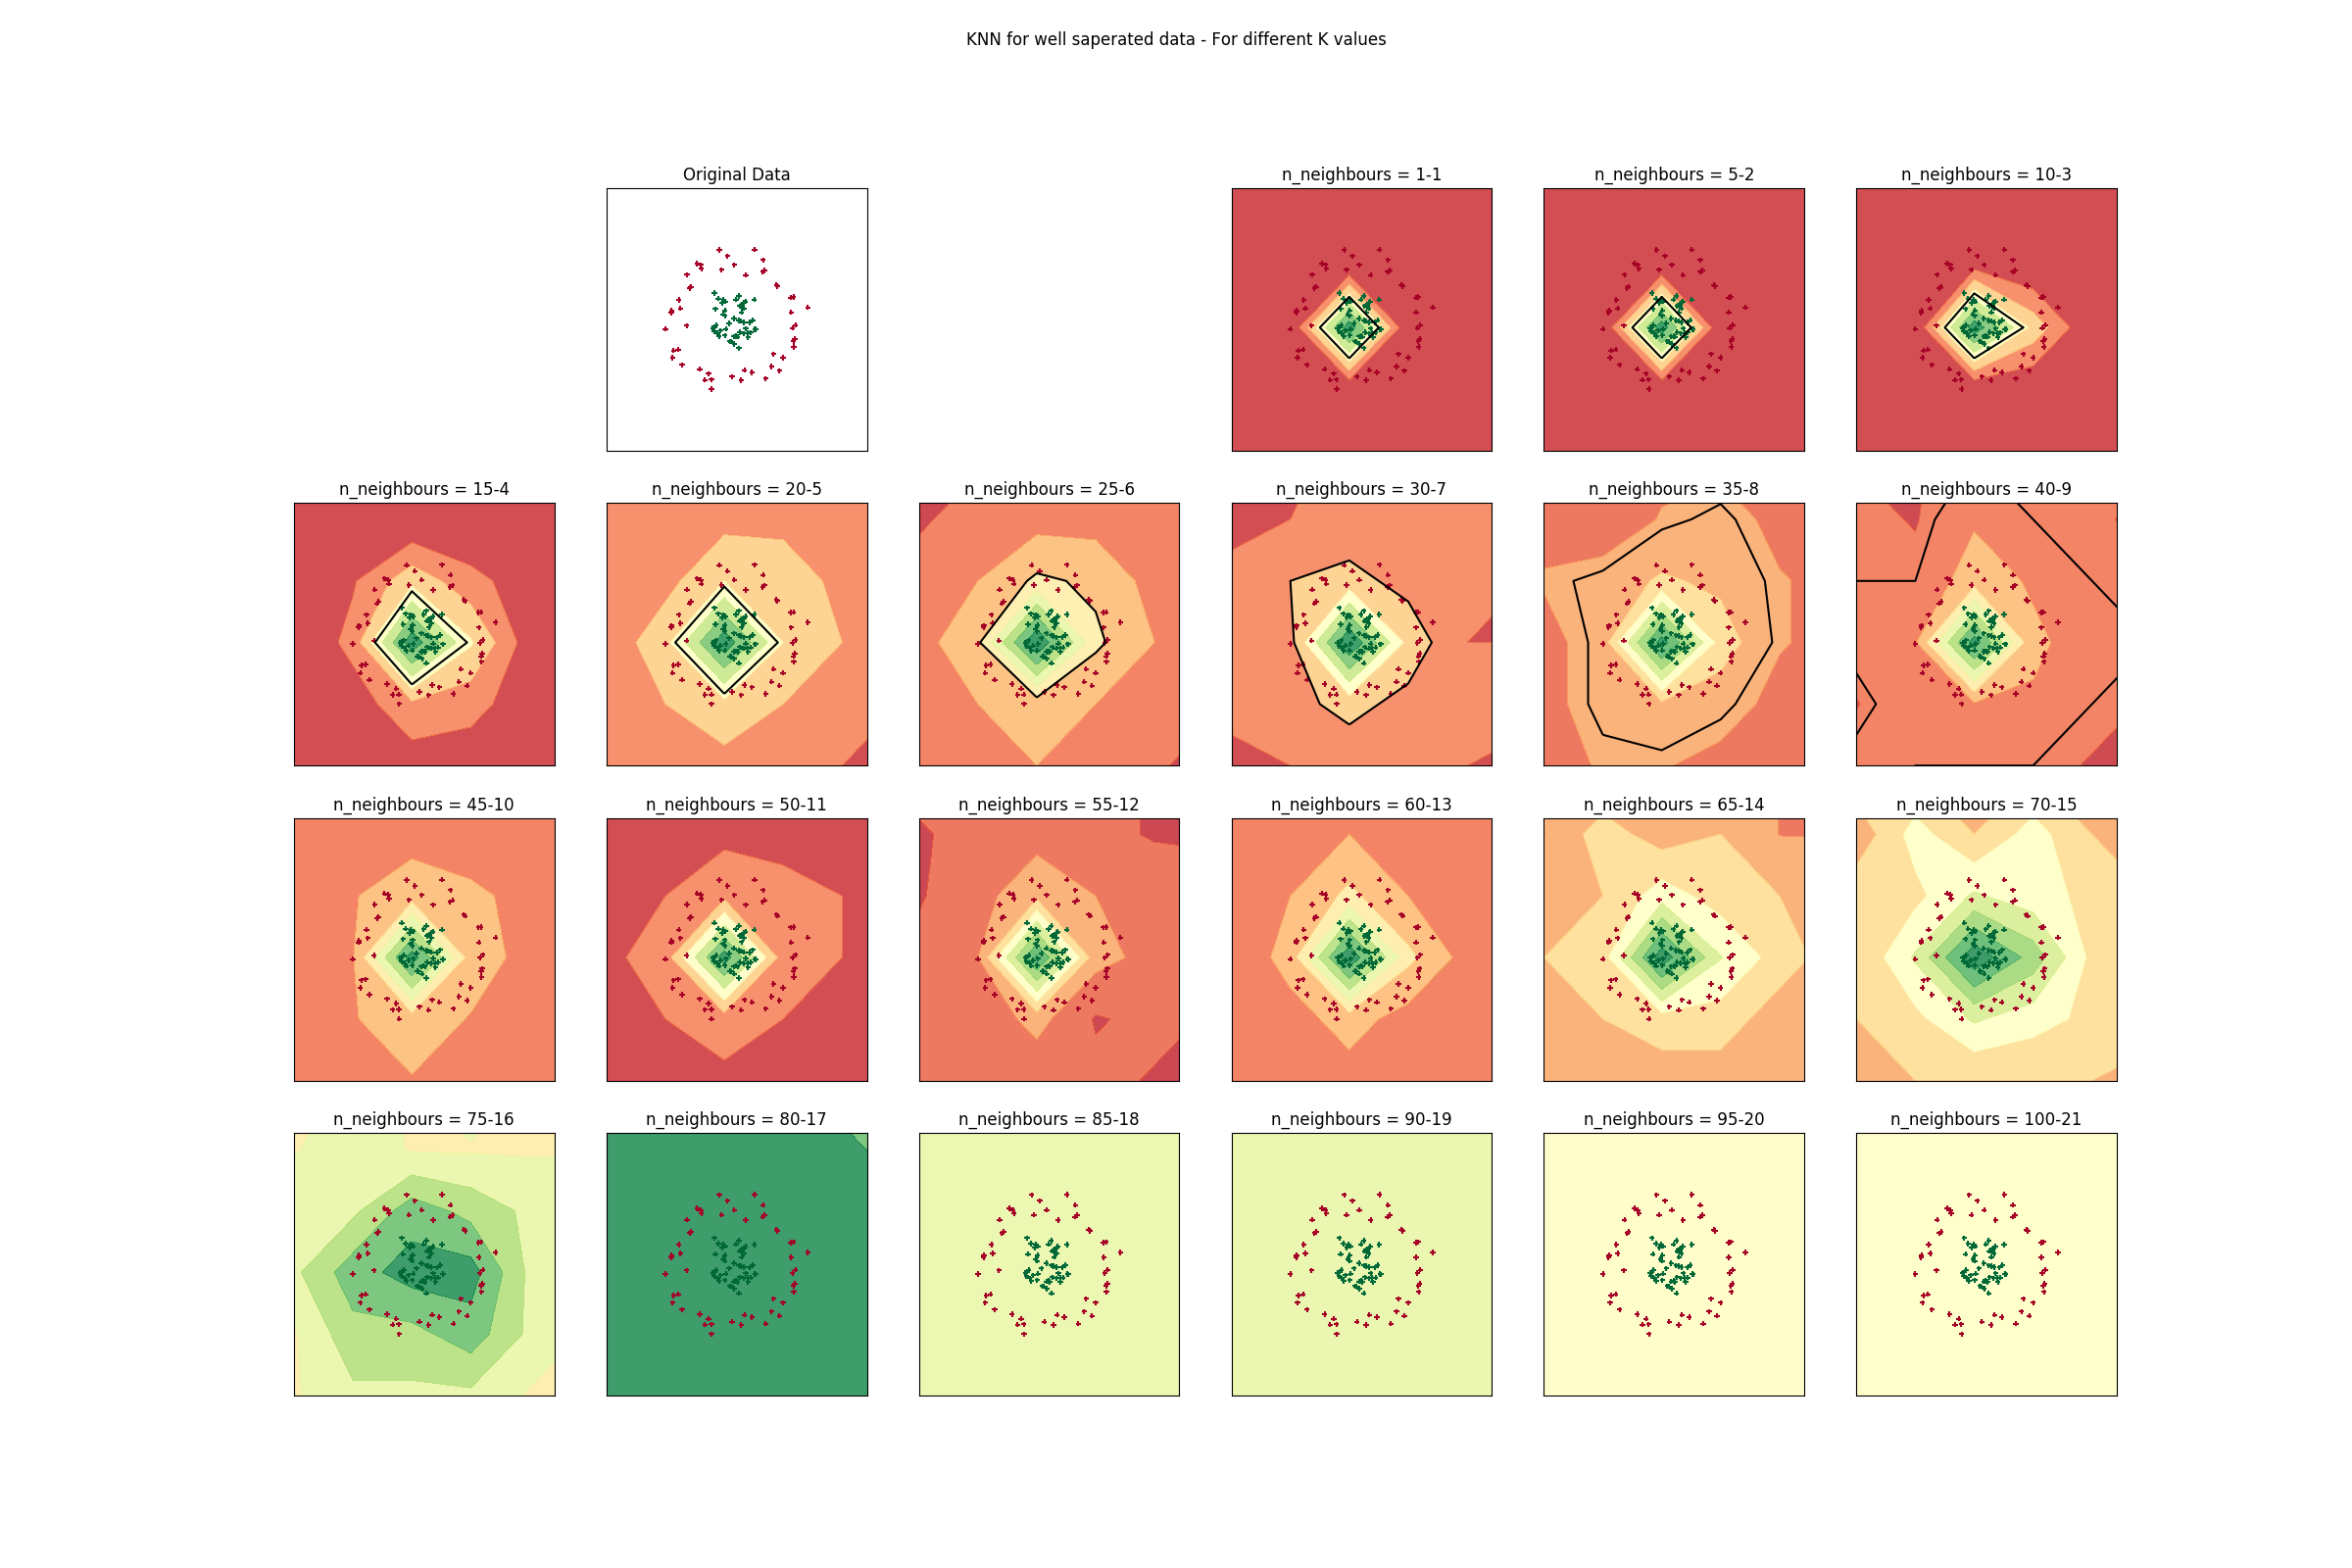

In [101]:
create_big_picture(X2, y2, classifiers,  titles, dir_name='knn/high_noise/')

### 1.3.2 creating individual plots for k=[ 1 , 100 ] with stepsize of 1

In [102]:
# creating k values
k_values = list()
k_values.extend([1]*10)
k_values.extend(range(2,100))
k_values.extend([100]*10)

In [104]:
save_plots_for_gif(X2, y2, 
                   get_knn_classifiers(k_values, X1, y1, verbose=False),
                   get_knn_titles(k_values), 
                   dir_name='knn/high_noise/knn_step_size_1/')

## 1.4. KNN for 3 types of data and with different k values [10, 20, ..., 100 ] 

<IPython.core.display.Javascript object>


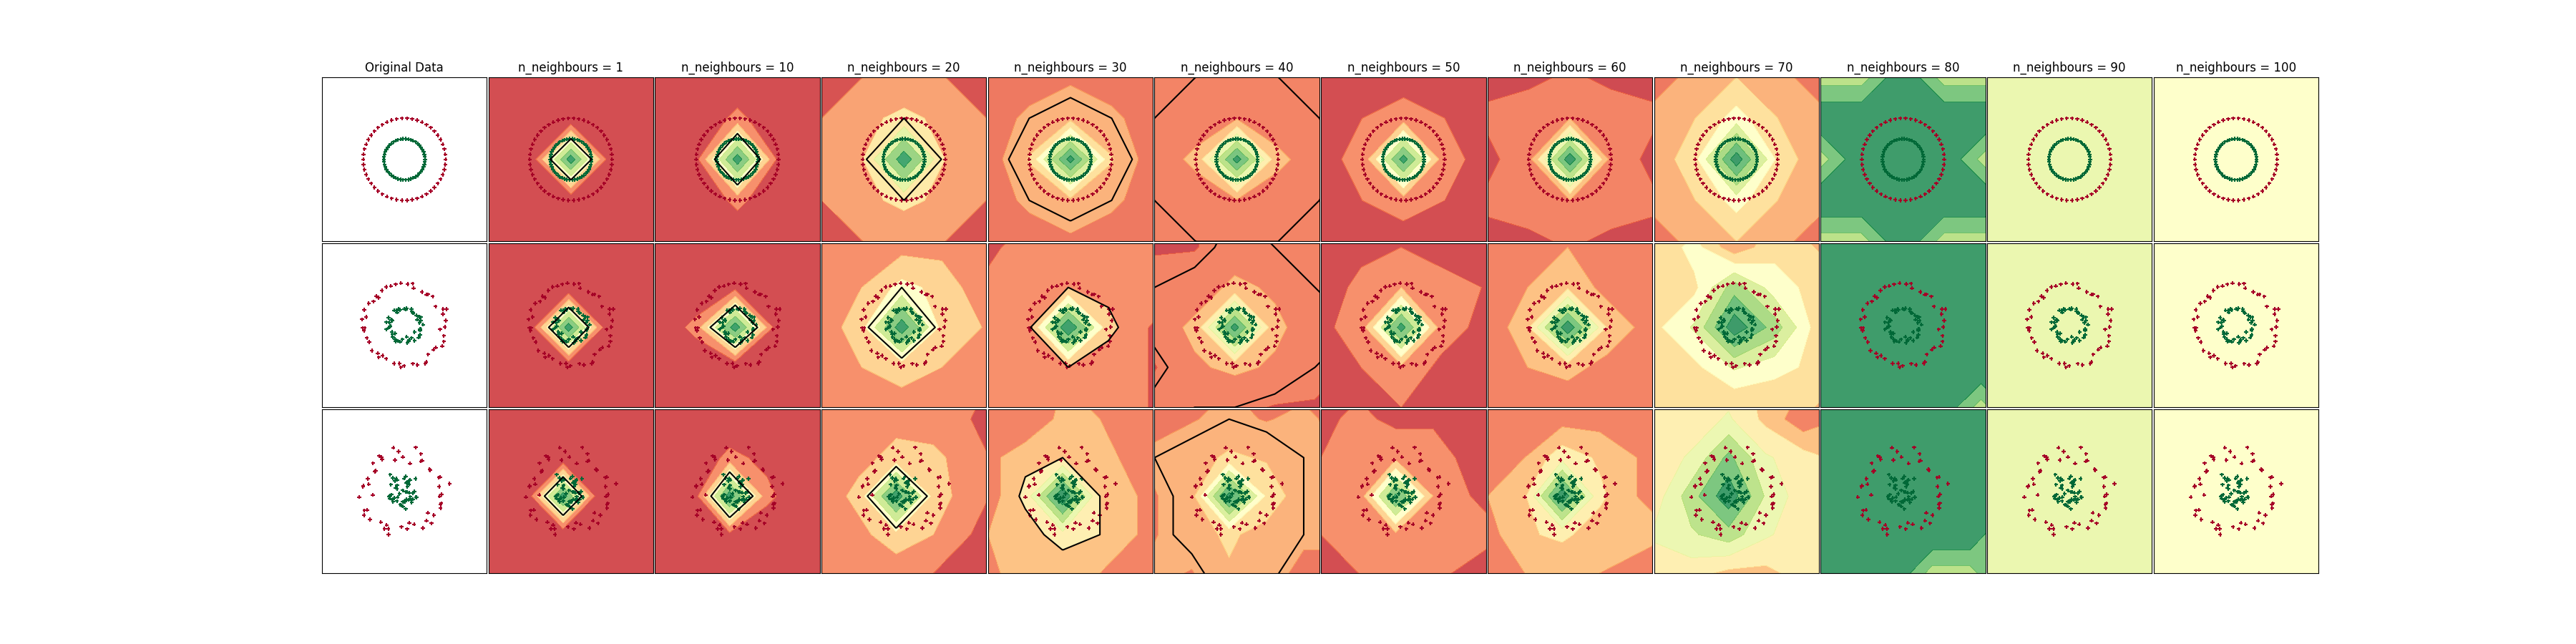

In [105]:
fig = plt.figure(figsize=(36,9))
gs = gridspec.GridSpec(nrows=3, ncols=12, hspace=0.01, wspace=0.01)

# create kvalues with k = [10, 100] with stepsize 10 along with  k = 1
k_values = list()
k_values.append(1)
k_values.extend(range(10,101,10))
    
# for noise free circular data
classifiers = list()
classifiers = get_knn_classifiers(k_values, X, y, verbose=False)
# get axis objects for the noise free circular data
axs = list()
ax_original = plt.subplot(gs[0,0])
for i in range(1,12):
    axs.append(plt.subplot(gs[0,i]))
# draw the plots in the first row with titles
draw_big_picture(X,y, ax_original, classifiers, axs, titles=get_knn_titles(k_values))


# for mild noisy circular data
classifiers = list()
classifiers = get_knn_classifiers(k_values, X1, y1, verbose=False)
axs = list()
ax_original = plt.subplot(gs[1,0])
for i in range(1,12):
    axs.append(plt.subplot(gs[1,i]))
# draw the plots in the second row without titles
draw_big_picture(X1,y1, ax_original, classifiers, axs, titles=None, put_titles=False)


# for high noisy circular data
classifiers = list()
classifiers = get_knn_classifiers(k_values, X2, y2, verbose=False)
axs = list()
ax_original = plt.subplot(gs[2,0])
for i in range(1,12):
    axs.append(plt.subplot(gs[2,i]))
# draw the plots in the third row without titles
draw_big_picture(X2,y2, ax_original, classifiers, axs, titles=None, put_titles=False)

plt.savefig('knn/big_picture.png')
plt.show()

# ------------------------------- DONE ------------------------------------------

<IPython.core.display.Javascript object>


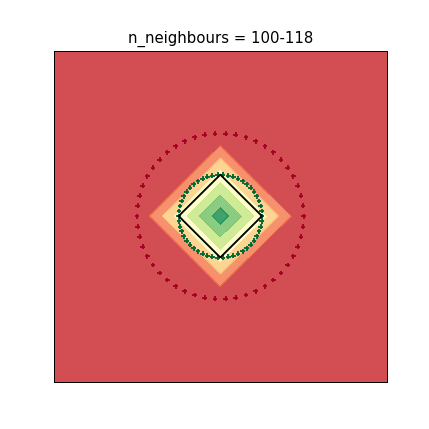

In [38]:
# find the borders to form a grid
x1_min, x1_max = x1.min()-1, x1.max()+1
x2_min, x2_max = x2.min()-1, x2.max()+1

# create a meshgrid (in this case it is 2d grid) with these boundaries
xx, yy = np.meshgrid(np.arange(x1_min-10, x1_max+10, 1),
                     np.arange(x2_min-10, x2_max+10, 1))
'''
We can create all possible points in that meshgrid with xx and yy
and tell the classifier to predict the for all the points in that grid.
'''
all_possible_points = np.c_[xx.ravel(), yy.ravel()]
'''
If this classifier can predict the probabilities get them. Otherwise just
get the normal predicted value(class label [1/0]). It is importatant because 
we can map the predicted values to a colour in our colourmap. If predicted 
values are probabilities, we can plot in such a way that we can interpret like how 
strong a perticular region is, just by looking at the plot.
'''
if hasattr(clf, 'predict_proba'):
    # we can take probabilitied of any one class (ay column)
    predicted = clfs[12].predict_proba(all_possible_points)[:, 1]
else:
    predicted = clfs[12].predict(all_possible_points)
# reshape the predicted into grid
Z = predicted.reshape(xx.shape)

fig = plt.figure(figsize=plt.figaspect(1))
ax = plt.subplot(111)
# plot the decision boundary with a black line
ax.contour(xx, yy, Z, colors='k', levels=[0.5])
ax.contourf(xx,yy, Z, cmap=plt.cm.RdYlGn, alpha=0.8)

# plot the original points with the same colour but darker
ax.scatter(x1,x2,s=15, c=y, cmap=plt.cm.RdYlGn, marker='+')
ax.set(xlim=[x1_min, x1_max], ylim=[x2_min, x2_max],
      xticks=[], yticks=[],
      title=title)
# fig.savefig('knn_step_size_1/'+title+'.png')
plt.show()